In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn

In [2]:
c_df = pd.read_csv('../us-counties.csv')
s_df = pd.read_csv('../us-states.csv')
h_df = pd.read_csv('../state_shelter.csv')
p_df = pd.read_csv('../state_population.csv')

In [3]:
c_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [4]:
h_df.head()

,date,state
0,2020-03-19,California
1,2020-03-21,Illinois
2,2020-03-21,New Jersey
3,2020-03-22,New York
4,2020-03-22,Ohio


In [5]:
p_df.head()

,state,pop,density
0,Alabama,4908621,96.9221
1,Alaska,734002,1.2863
2,Arizona,7378494,64.9550
3,Arkansas,3038999,58.4030
4,California,39937489,256.3727


In [6]:
state_m_df = pd.merge(p_df, h_df, left_on='state', right_on='state')
state_m_df['shelter_date'] = state_m_df['date']
state_m_df = state_m_df.drop(columns='date')
state_m_df.head()

,state,pop,density,shelter_date
0,Alaska,734002,1.2863,2020-03-28
1,California,39937489,256.3727,2020-03-19
2,Colorado,5845526,56.4011,2020-03-26
3,Connecticut,3563077,735.8689,2020-03-23
4,Delaware,982895,504.3073,2020-03-24


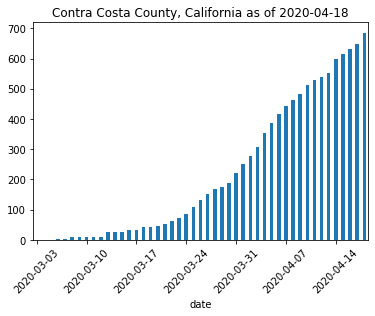

In [7]:
def plot_accum_county_cases(county, state):
    df = c_df[(c_df["county"] == county) & (c_df["state"] == state)][['date','cases']].reset_index().drop(columns='index')
    ax = df.plot(kind='bar',x='date', y='cases')
    ax.get_legend().remove()
    _x = np.arange(df.date.size)
    plt.xticks(_x[::7], list(df.date)[::7], rotation=45)
    plt.title(county + ' County, ' + state + ' as of ' + max(df.date))
    
plot_accum_county_cases('Contra Costa', 'California')
# plot_accum_county_cases('San Francisco', 'California')
# plot_accum_county_cases('DeKalb','Georgia')
# plot_accum_county_cases('New York City','New York')


In [8]:
def plot_accum_state_cases(state):
    df = s_df[s_df["state"] == state][['date','cases']].reset_index().drop(columns='index')
    ax = df.plot(kind='bar',x='date', y='cases')
    ax.get_legend().remove()
    _x = np.arange(df.date.size)
    plt.xticks(_x[::7], list(df.date)[::7], rotation=45)
    plt.xticks(rotation=45)
    plt.title(state + " as of " + max(df.date))
    
# plot_accum_state_cases('California')
# plot_accum_state_cases('Georgia')
# plot_accum_state_cases('New York')

In [9]:
def plot_accum_state_cases(state):
    df = s_df[s_df["state"] == state][['date','cases']].reset_index().drop(columns='index')
    ax = df.plot(kind='bar',x='date', y='cases')
    ax.get_legend().remove()
    _x = numpy.arange(df.date.size)
    matplotlib.pyplot.xticks(_x[::7], list(df.date)[::7], rotation=45)
    matplotlib.pyplot.xticks(rotation=45)
    matplotlib.pyplot.title(state + " as of " + max(df.date))

In [10]:
# state = "California"
# #def plot_state_stats(state):
# fig = plt.figure()
# f = plt.figure(figsize=(30,30))
# f.suptitle(state + " data, \nshelter-in-place order day in red", fontsize=30)
    
# def format_axes(ax, df):
#     _x = np.arange(df.date.size)
#     freq = 7
#     ax.set_xticks(_x[::freq])
#     ax.set_xticklabels(list(df.date)[::freq], rotation=45)
#     ax.tick_params(axis='both', which='major', labelsize=20)
    
# df = s_df[s_df["state"] == state].reset_index().drop(columns='index')
# df = df.tail(n=29)  # pick an n s.t. n = 7*k + 1
# df['new_cases'] = df['cases'].diff().fillna(0).astype('int')
# df['pct_inc'] = df['cases'].pct_change().fillna(0)

# ax1 = f.add_subplot(221)
# ax1.bar(df.date, df['new_cases'])
# highlight_state_shelter_in_place(df, state, 'new_cases', ax1)
# format_axes(ax1, df)
# ax1.set_title("New cases " + state + " as of " + max(df.date), fontsize=24)

# ax2 = f.add_subplot(222)
# ax2.bar(df.date, df['pct_inc'])
# highlight_state_shelter_in_place(df, state, 'pct_inc', ax2)
# format_axes(ax2, df)
# ax2.set_title("Percent daily increase in cases " + state + " as of " + max(df.date), fontsize=24)

# ax3 = f.add_subplot(223)
# df = c_df[(c_df["state"] == state) & (c_df["county"] == county)][['date','cases','deaths']].reset_index().drop(columns='index')
# ax3.bar(df.date, df[column])
# highlight_state_shelter_in_place(df, state, column, ax3)
# format_axes(ax3, df)
# ax3.set_title("Total cases " + county + ", " + state + " as of " + max(df.date), fontsize=24)

# ax4 = f.add_subplot(224)
# new_column = 'new_' + column
# df[new_column]=df[column].diff().fillna(0).astype('int')
# ax4.bar(df.date, df[new_column])
# highlight_state_shelter_in_place(df, state, new_column, ax4)
# format_axes(ax4, df)
# ax4.set_title("New cases " + county + ", " + state + " as of " + max(df.date), fontsize=24)

plt.show()

# def highlight_state_shelter_in_place(df, state, column, ax):
#     if len(state_m_df[state_m_df['state'] == state]) == 1:
#         df_highlight = df[df['date'] == state_m_df[state_m_df['state'] == state].shelter_date.values[0]]
#         ax.bar(df_highlight.date, df_highlight[column], color='r')         



In [11]:
def plot_county_and_state(county, state, column='cases'):
    fig = plt.figure()
    f = plt.figure(figsize=(30,30))

    ax1 = f.add_subplot(221)
    df = s_df[s_df["state"] == state][['date','cases','deaths']].reset_index().drop(columns='index')
    df = df.tail(n=29)  # pick an n s.t. n = 7*k + 1
    ax1.bar(df.date, df[column])
    highlight_state_shelter_in_place(df, state, column, ax1)
    format_axes(ax1, df)
    ax1.set_title("Total " + column + " " + state + " as of " + max(df.date), fontsize=24)
    
    ax2 = f.add_subplot(222)
    new_column = 'new_' + column
    df[new_column]=df[column].diff().fillna(0).astype('int')
    ax2.bar(df.date, df[new_column])
    highlight_state_shelter_in_place(df, state, new_column, ax2)
    format_axes(ax2, df)
    ax2.set_title("New " + column + " " + state + " as of " + max(df.date), fontsize=24)
    
    ax3 = f.add_subplot(223)
    df = c_df[(c_df["state"] == state) & (c_df["county"] == county)][['date','cases','deaths']].reset_index().drop(columns='index')
    ax3.bar(df.date, df[column])
    highlight_state_shelter_in_place(df, state, column, ax3)
    format_axes(ax3, df)
    ax3.set_title("Total " + column + " " + county + ", " + state + " as of " + max(df.date), fontsize=24)

    ax4 = f.add_subplot(224)
    new_column = 'new_' + column
    df[new_column]=df[column].diff().fillna(0).astype('int')
    ax4.bar(df.date, df[new_column])
    highlight_state_shelter_in_place(df, state, new_column, ax4)
    format_axes(ax4, df)
    ax4.set_title("New " + column + " " + county + ", " + state + " as of " + max(df.date), fontsize=24)
    
    plt.show()

def highlight_state_shelter_in_place(df, state, column, ax):
    if len(state_m_df[state_m_df['state'] == state]) == 1:
        df_highlight = df[df['date'] == state_m_df[state_m_df['state'] == state].shelter_date.values[0]]
        ax.bar(df_highlight.date, df_highlight[column], color='r')         
    
def format_axes(ax, df):
    _x = np.arange(df.date.size)
    freq = 7
    ax.set_xticks(_x[::freq])
    ax.set_xticklabels(list(df.date)[::freq], rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=20)


<Figure size 432x288 with 0 Axes>

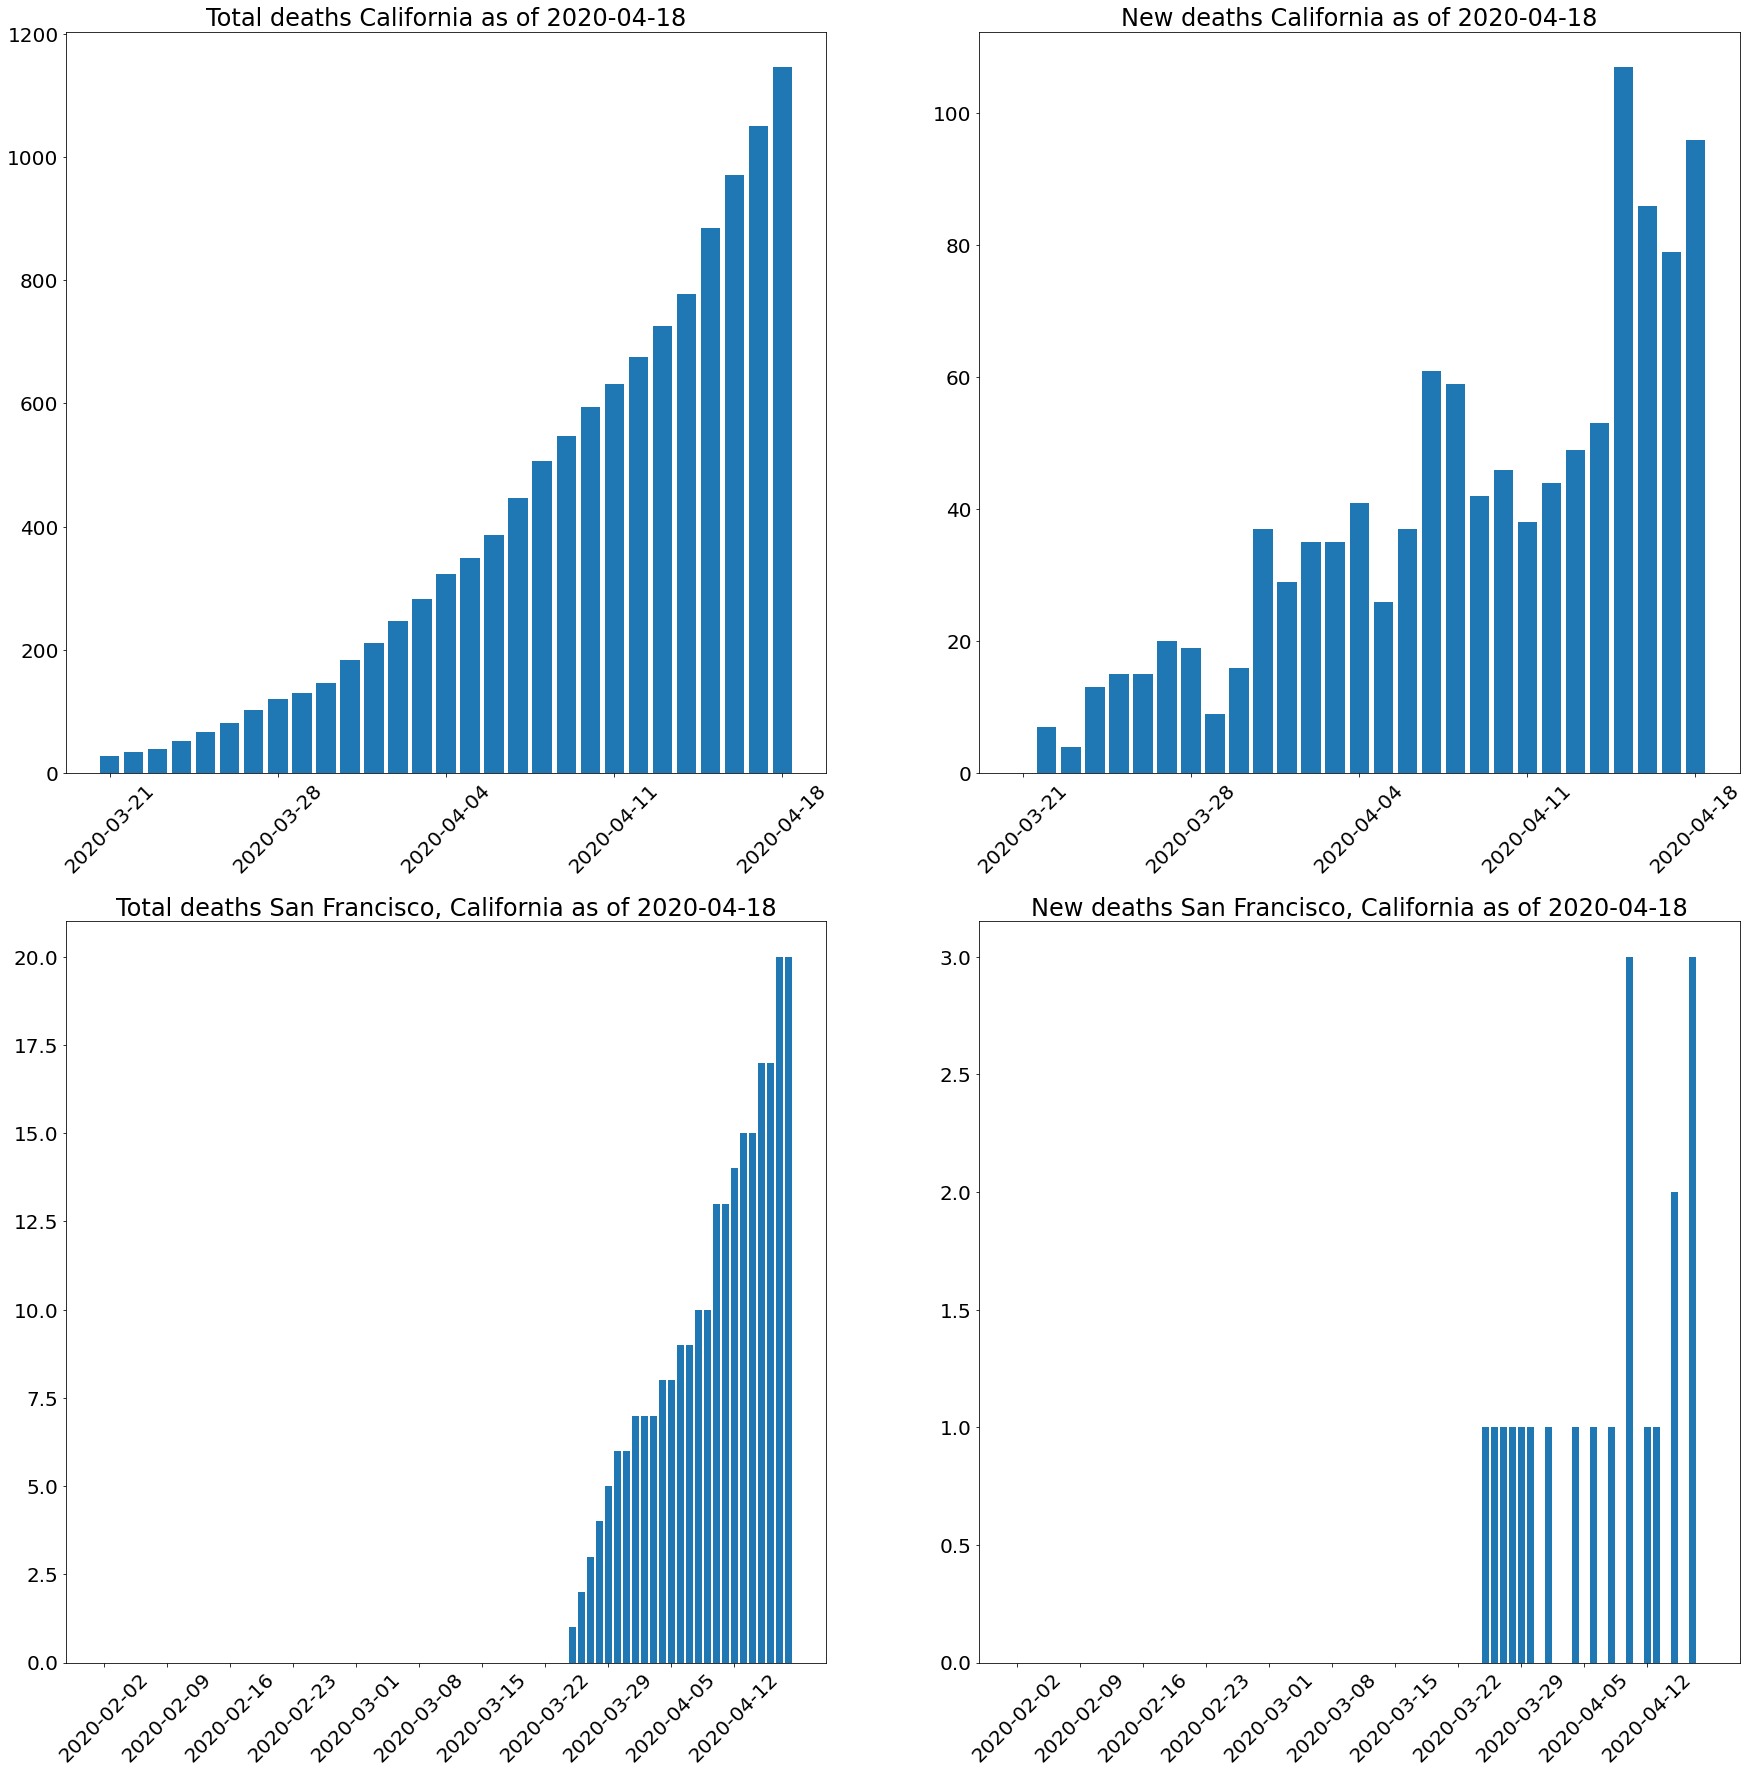

In [12]:
plot_county_and_state('San Francisco', 'California', 'deaths')
#plot_county_and_state('Contra Costa', 'California')
#plot_county_and_state('DeKalb', 'Georgia')
#plot_county_and_state('New York City', 'New York')

In [13]:
# f(slope of 3 day moving average pct increase new cases, shelter-in-place, option? state density)

In [14]:
def plot_state_stats_spread_rate(state):

    def format_axes(ax, df):
        _x = np.arange(df.date.size)
        freq = 7
        ax.set_xticks(_x[::freq])
        ax.set_xticklabels(list(df.date)[::freq], rotation=45)
        ax.tick_params(axis='both', which='major', labelsize=20)


    fig = plt.figure()
    f = plt.figure(figsize=(30,30))
    f.suptitle(state + " data, \nshelter-in-place order day in red", fontsize=30)
    df = s_df[s_df["state"] == state].reset_index().drop(columns='index')

    df['new_cases'] = df['cases'].diff().fillna(0).astype('int')

    df['new_cases'].iloc[1]

    for i in range(0, df.shape[0] - 2):
        df.loc[df.index[i + 2], 'new_cases_3dma'] = (
            df['new_cases'].iloc[i] + df['new_cases'].iloc[i+1] + df['new_cases'].iloc[i+2]
        ) / 3
    df['proportion new cases to total cases'] = df['new_cases_3dma'] / df['cases']

    df['proportion new cases to active cases'] = df['new_cases_3dma'] / df['cases']
    for i in range(0, df.shape[0] - 14):
        df.loc[df.index[i + 14], 'proportion new cases to active cases'] = (
            df['new_cases_3dma'].iloc[i + 14] / (df['cases'].iloc[i + 14] - df['cases'].iloc[i])
        )


    df['new_cases_3dma'] = df['new_cases_3dma'].fillna(0)
    df['proportion new cases to total cases'] = df['proportion new cases to total cases'].fillna(0)
    df['proportion new cases to active cases'] = df['proportion new cases to active cases'].fillna(0)
    df = df.tail(n=29)  # pick an n s.t. n = 7*k + 1
    df

    ax1 = f.add_subplot(221)
    ax1.bar(df.date, df['new_cases_3dma'])
    highlight_state_shelter_in_place(df, state, 'new_cases_3dma', ax1)
    format_axes(ax1, df)
    ax1.set_title("New cases 3-day MA " + state, fontsize=24)

    ax2 = f.add_subplot(222)
    ax2.bar(df.date, df['proportion new cases to active cases'])
    highlight_state_shelter_in_place(df, state, 'proportion new cases to active cases', ax2)
    format_axes(ax2, df)
    ax2.set_title("Proportion increase in new cases to active cases (omit cases 14 days prior) " + state, fontsize=24)

    plt.show()

<Figure size 432x288 with 0 Axes>

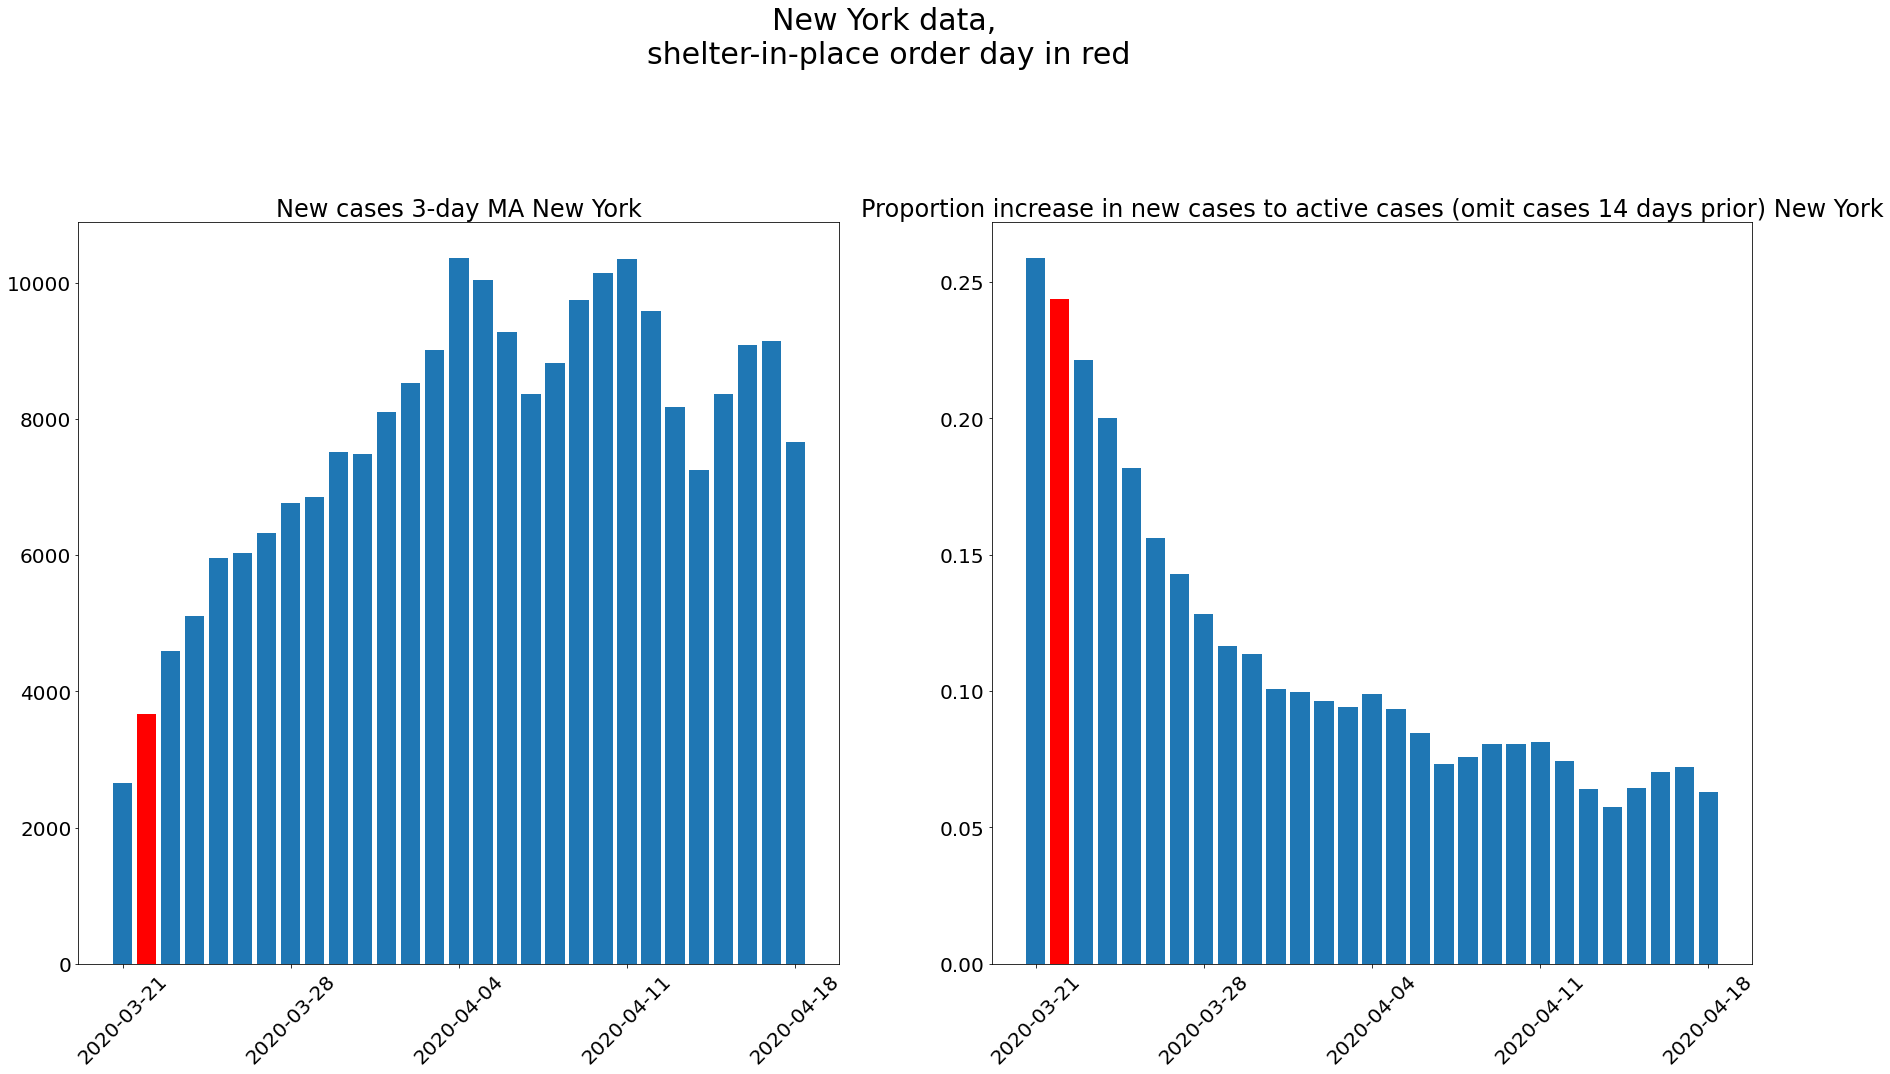

In [15]:
plot_state_stats_spread_rate('New York')

<Figure size 432x288 with 0 Axes>

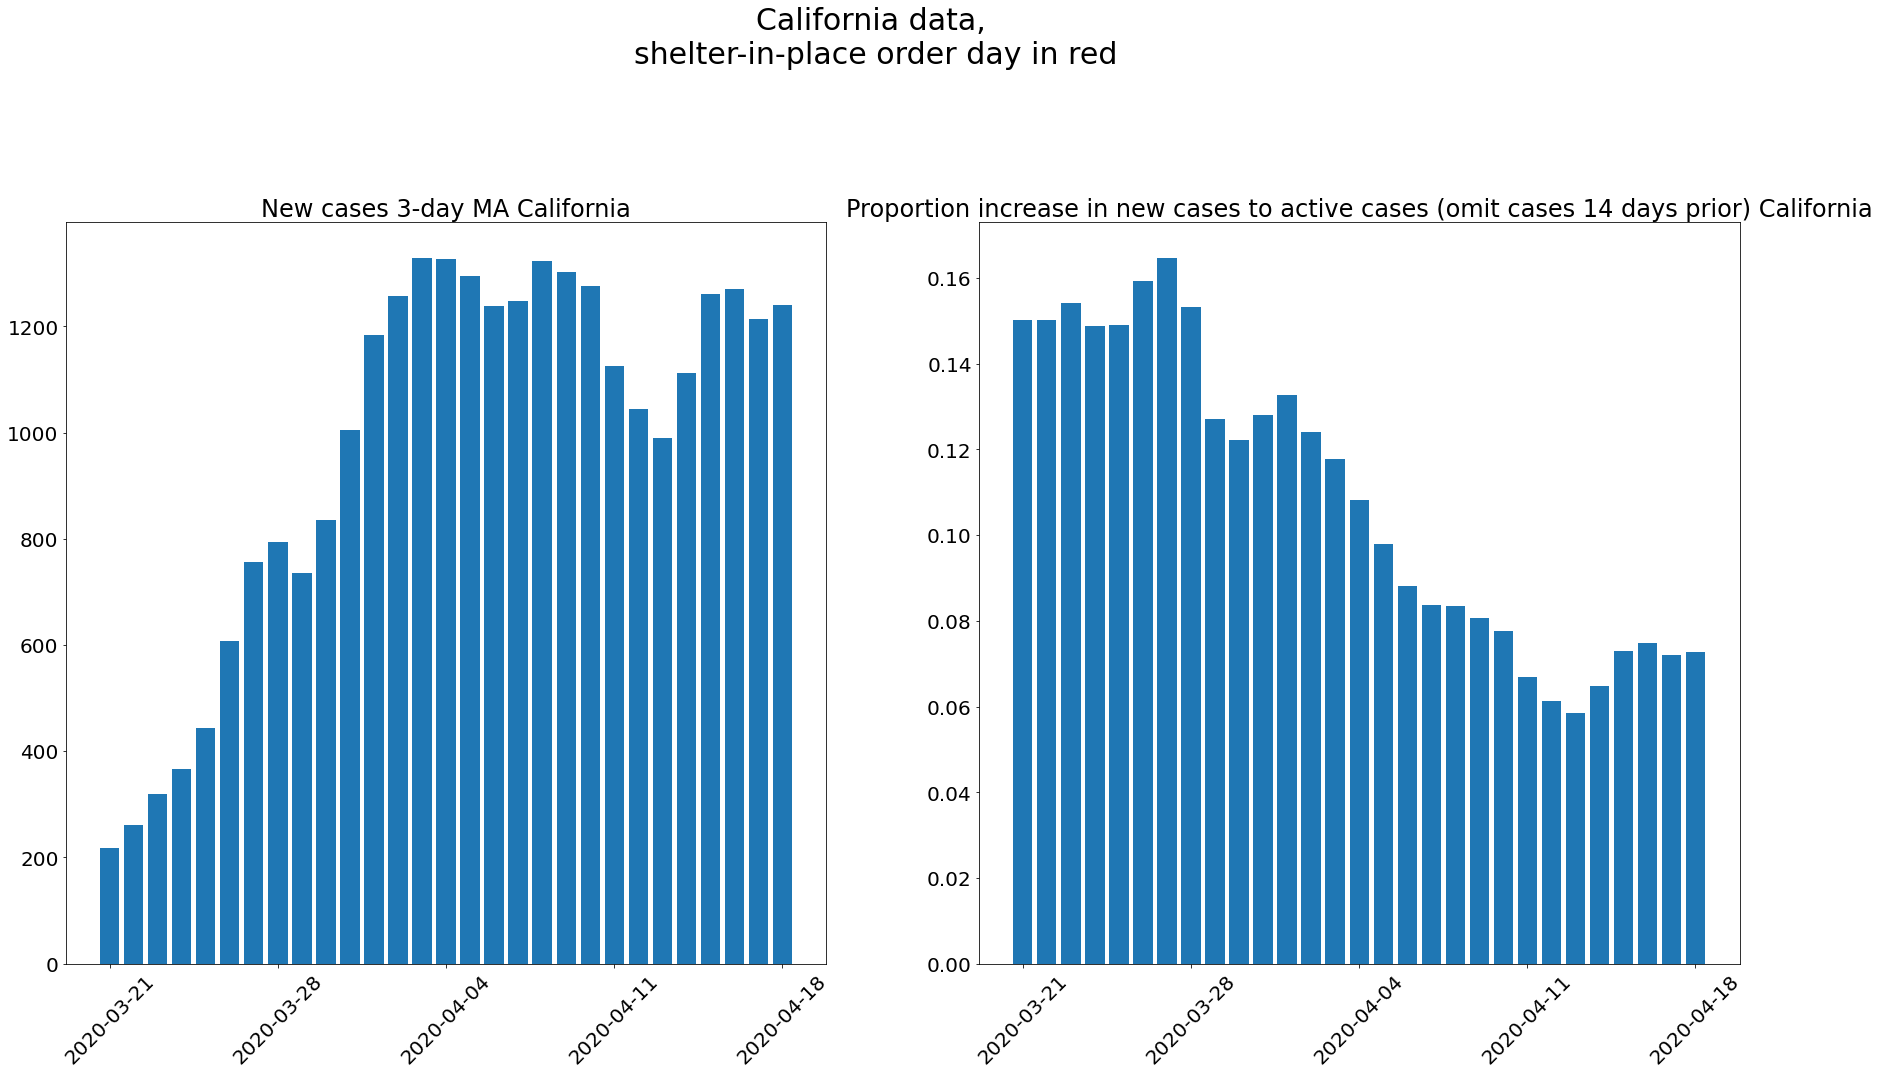

In [16]:
plot_state_stats_spread_rate('California')

<Figure size 432x288 with 0 Axes>

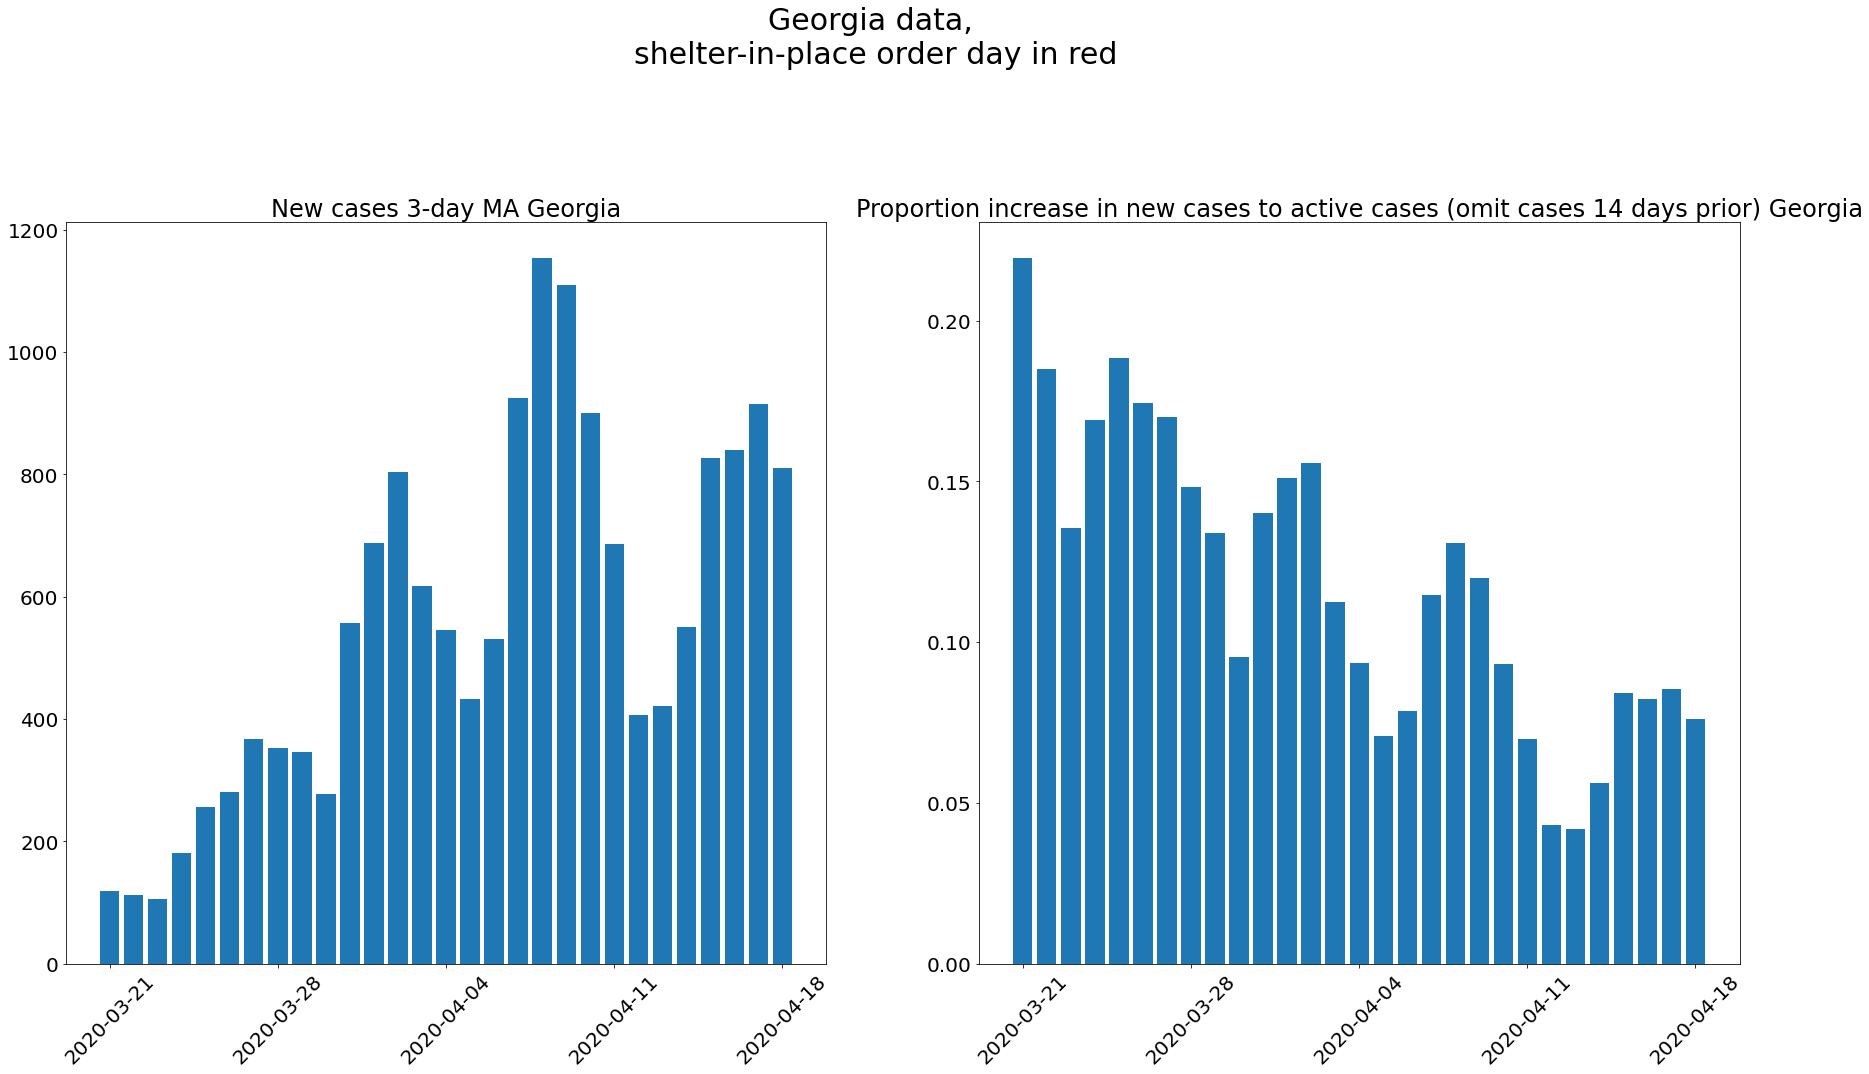

In [17]:
plot_state_stats_spread_rate('Georgia')

<Figure size 432x288 with 0 Axes>

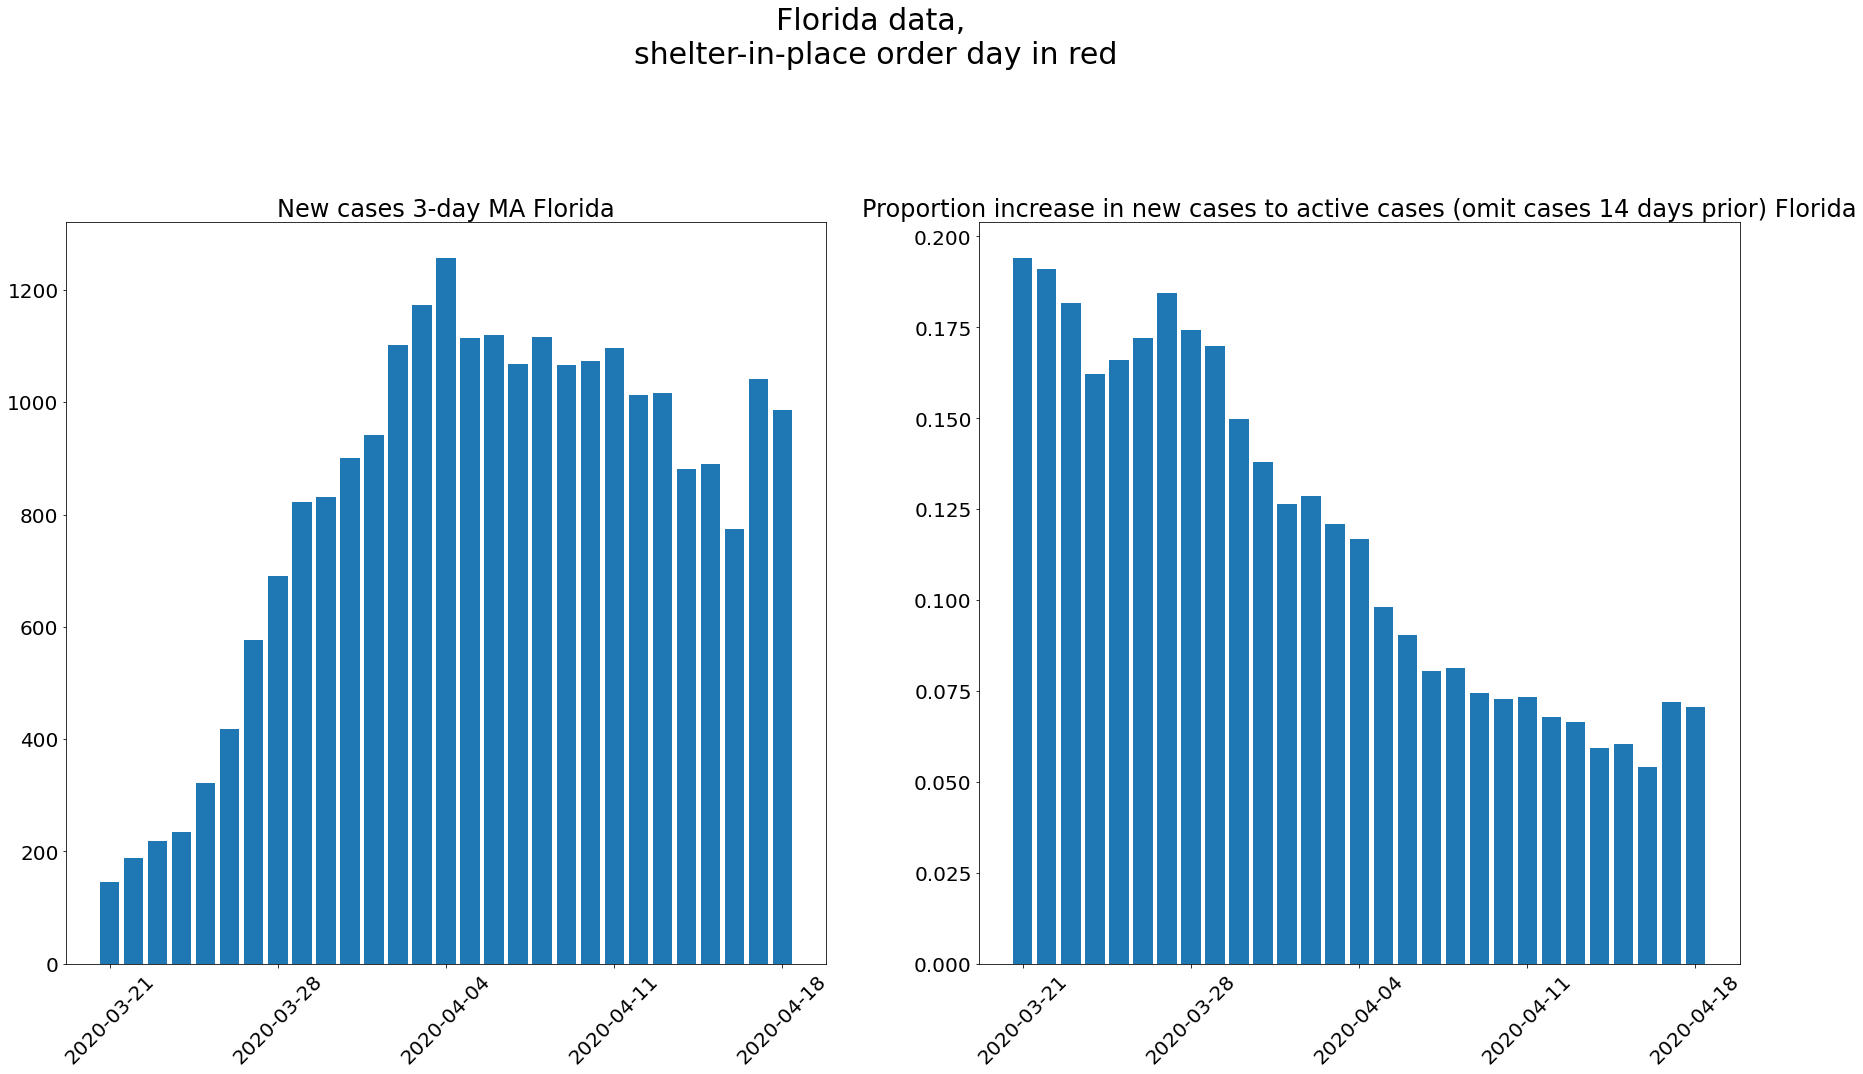

In [18]:
plot_state_stats_spread_rate('Florida')

Text(0.5, 1.0, 'Percent daily increase in cases California as of 2020-04-18')

<Figure size 432x288 with 0 Axes>

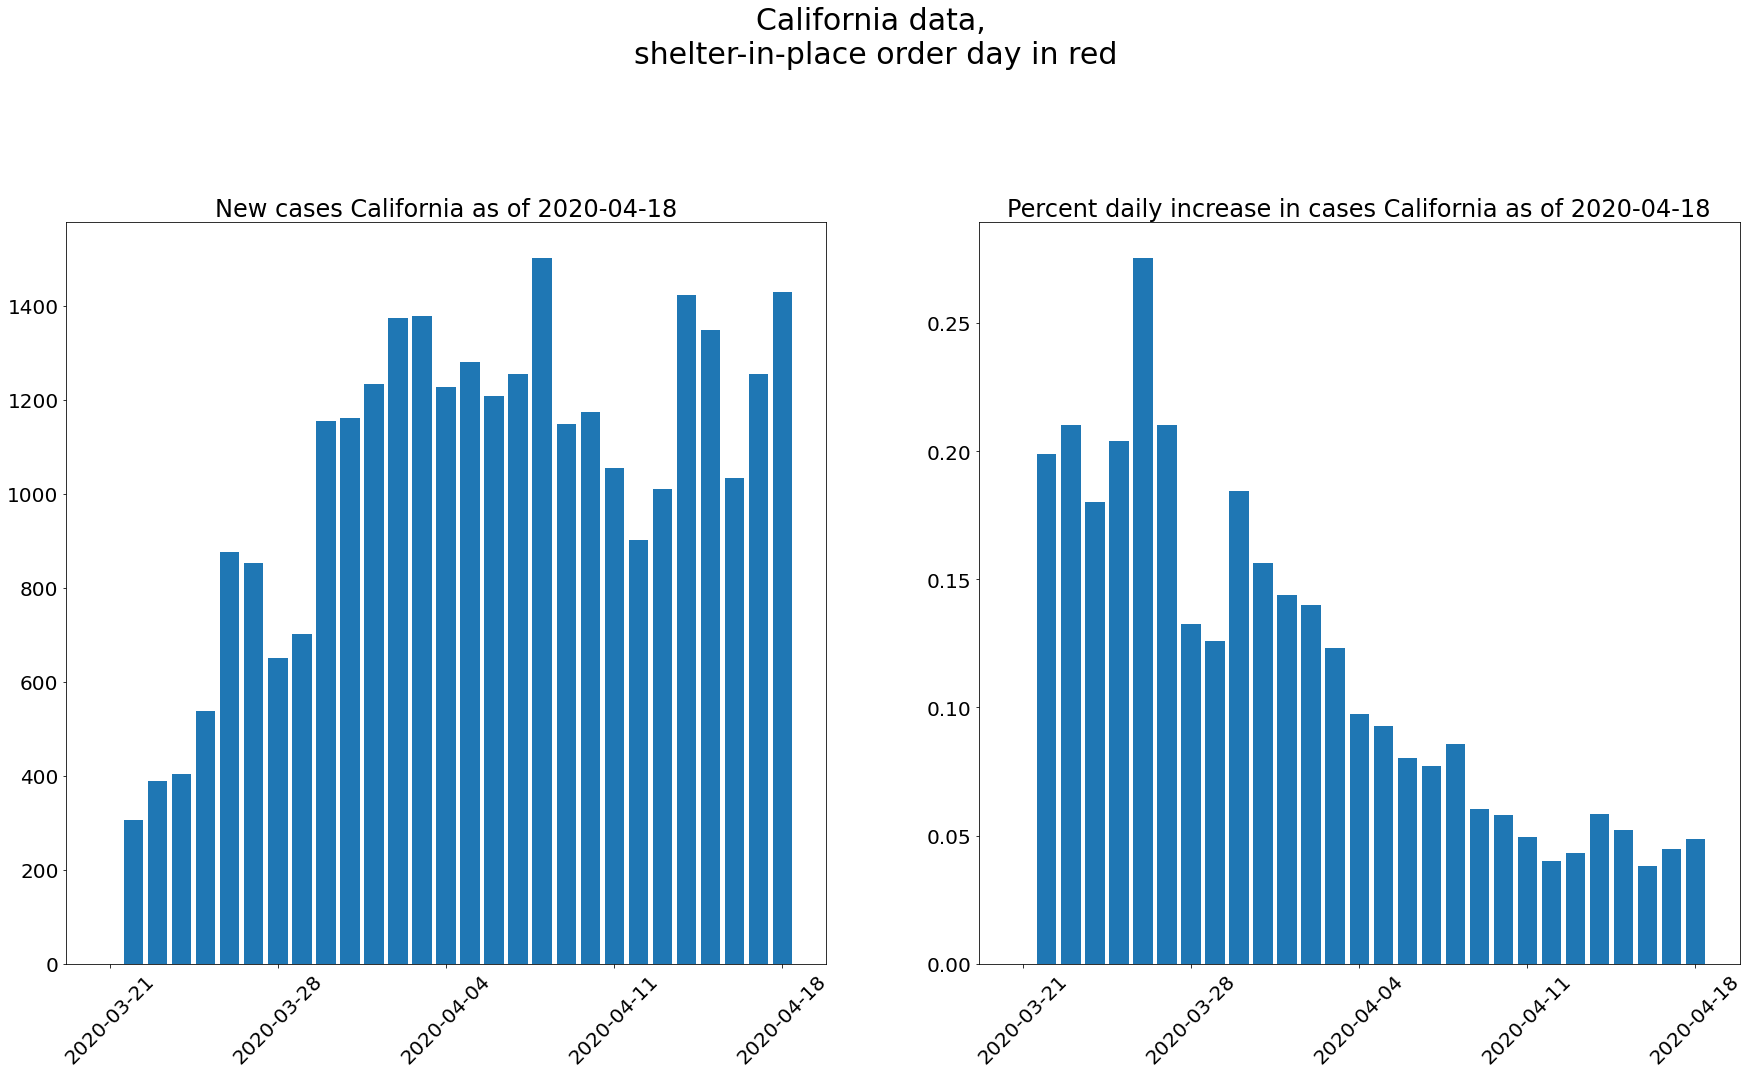

In [19]:
state = "California"
#def plot_state_stats(state):
fig = plt.figure()
f = plt.figure(figsize=(30,30))
f.suptitle(state + " data, \nshelter-in-place order day in red", fontsize=30)
    
def format_axes(ax, df):
    _x = np.arange(df.date.size)
    freq = 7
    ax.set_xticks(_x[::freq])
    ax.set_xticklabels(list(df.date)[::freq], rotation=45)
    ax.tick_params(axis='both', which='major', labelsize=20)
    
df = s_df[s_df["state"] == state].reset_index().drop(columns='index')
df = df.tail(n=29)  # pick an n s.t. n = 7*k + 1
df['new_cases'] = df['cases'].diff().fillna(0).astype('int')
df['pct_inc'] = df['cases'].pct_change().fillna(0)

ax1 = f.add_subplot(221)
ax1.bar(df.date, df['new_cases'])
highlight_state_shelter_in_place(df, state, 'new_cases', ax1)
format_axes(ax1, df)
ax1.set_title("New cases " + state + " as of " + max(df.date), fontsize=24)

ax2 = f.add_subplot(222)
ax2.bar(df.date, df['pct_inc'])
highlight_state_shelter_in_place(df, state, 'pct_inc', ax2)
format_axes(ax2, df)
ax2.set_title("Percent daily increase in cases " + state + " as of " + max(df.date), fontsize=24)

In [20]:
# plot 50 states 3 day moving average of new cases

In [21]:
state = "California"
df = s_df[s_df["state"] == state].reset_index().drop(columns='index')

df['new_cases'] = df['cases'].diff().fillna(0).astype('int')

df['new_cases'].iloc[1]

for i in range(0, df.shape[0] - 2):
    df.loc[df.index[i + 2], 'new_cases_3dma'] = (
        df['new_cases'].iloc[i] + df['new_cases'].iloc[i+1] + df['new_cases'].iloc[i+2]
    ) / 3
df['proportion new cases to total cases'] = df['new_cases_3dma'] / df['cases']

df['proportion new cases to active cases'] = df['new_cases_3dma'] / df['cases']
for i in range(0, df.shape[0] - 14):
    df.loc[df.index[i + 14], 'proportion new cases to active cases'] = (
        df['new_cases_3dma'].iloc[i + 14] / (df['cases'].iloc[i + 14] - df['cases'].iloc[i])
    )


df['new_cases_3dma'] = df['new_cases_3dma'].fillna(0)
df['proportion new cases to total cases'] = df['proportion new cases to total cases'].fillna(0)
df['proportion new cases to active cases'] = df['proportion new cases to active cases'].fillna(0)
df = df.tail(n=29)  # pick an n s.t. n = 7*k + 1
df.tail()#.new_cases_3dma/2000

,date,state,fips,cases,deaths,new_cases,new_cases_3dma,proportion new cases to total cases,proportion new cases to active cases
80,2020-04-14,California,6,25758,778,1424,1112.333333,0.043184,0.064761
81,2020-04-15,California,6,27107,885,1349,1261.333333,0.046532,0.072947
82,2020-04-16,California,6,28142,971,1035,1269.333333,0.045105,0.074878
83,2020-04-17,California,6,29398,1050,1256,1213.333333,0.041273,0.072098
84,2020-04-18,California,6,30829,1146,1431,1240.666667,0.040243,0.072839


In [23]:
import seaborn as sns

In [39]:
list(df.new_cases)

[12,
 60,
 7,
 23,
 50,
 68,
 61,
 97,
 110,
 144,
 161,
 174,
 216,
 261,
 307,
 389,
 404,
 539,
 877,
 854,
 651,
 701,
 1155,
 1161,
 1234,
 1179,
 1574,
 1227,
 1280]

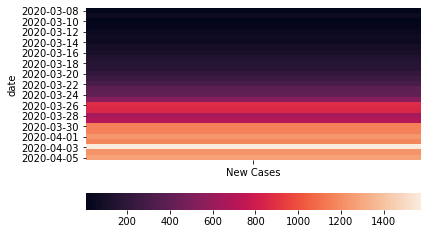

In [43]:
tmp_df = pd.DataFrame({"New Cases": list(df.new_cases)}, index=df.date)
sns.heatmap(tmp_df, cbar_kws={"orientation": "horizontal"})

In [42]:
sns.heatmap??

In [44]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [45]:
flights = flights.pivot("month", "year", "passengers")
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [24]:
s_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


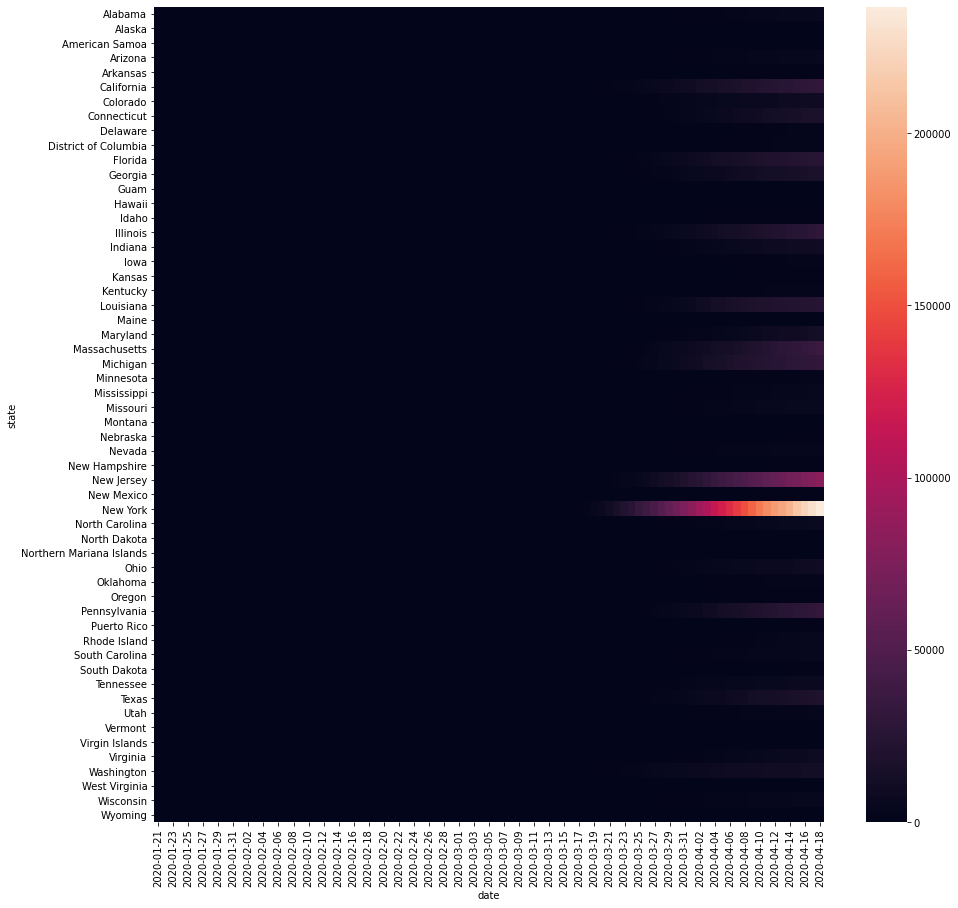

In [25]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(s_df.pivot("state", "date", "cases").fillna(0), yticklabels=True)

In [26]:
df = s_df.copy()
df.sort_values(['state', 'date'], inplace=True)
df.set_index(['state', 'date'], inplace=True)
df['new_cases'] = np.nan
df['log_cases'] = np.nan
df['log_new_cases'] = np.nan
df['prop_new_to_total_cases'] = np.nan

for state in df.index.levels[0]:
    df.new_cases[state] = df.cases[state].diff().fillna(0)
    df.prop_new_to_total_cases[state] = df.new_cases[state] / df.cases[state]
    df.log_cases[state] = np.log(df.cases[state])
    #df.log_new_cases[state] = min(1, np.log(df.new_cases[state]).fillna(1))
# for state in df.index.levels[0]:
    
#     for i in range(0, df.shape[0] - 2):
#         df.loc[df.index[i + 2], 'new_cases_3dma'] = (
#             df['new_cases'].iloc[i] + df['new_cases'].iloc[i+1] + df['new_cases'].iloc[i+2]
#         ) / 3
    
df = df.reset_index()
    
df.head()
    
#df['state' == 'California']
# dfd
# for state in set(s_df.state):
#     print(len(df[df['state'] == state]))
    
    
#     df[df['state' == state]]['new_cases'] = range(35)
#     print(len(df[df['state'] == state]
#     #print(df)
#     dfd
# for i in range(0, df.shape[0] - 2):
#     df[state].loc[df.index[i + 2], 'new_cases_3dma'] = (
#         df[state]['new_cases'].iloc[i] + df[state]['new_cases'].iloc[i+1] + df[state]['new_cases'].iloc[i+2]
#     ) / 3

# df['proportion new cases to total cases'] = df['new_cases_3dma'] / df['cases']

# df['proportion new cases to active cases'] = df['new_cases_3dma'] / df['cases']
# for i in range(0, df.shape[0] - 14):
#     df.loc[df.index[i + 14], 'proportion new cases to active cases'] = (
#         df['new_cases_3dma'].iloc[i + 14] / (df['cases'].iloc[i + 14] - df['cases'].iloc[i])
#     )


# df['new_cases_3dma'] = df['new_cases_3dma'].fillna(0)
# df['proportion new cases to total cases'] = df['proportion new cases to total cases'].fillna(0)
# df['proportion new cases to active cases'] = df['proportion new cases to active cases'].fillna(0)

# df
#df.pivot("state", "date", "new_cases_3dma")

/Users/ryanirwin/pg/jupyter/virtualenv_run/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/ryanirwin/pg/jupyter/virtualenv_run/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/ryanirwin/pg/jupyter/virtualenv_run/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

,state,date,fips,cases,deaths,new_cases,log_cases,log_new_cases,prop_new_to_total_cases
0,Alabama,2020-03-13,1,6,0,0.0,1.791759,NaN,0.000000
1,Alabama,2020-03-14,1,12,0,6.0,2.484907,NaN,0.500000
2,Alabama,2020-03-15,1,23,0,11.0,3.135494,NaN,0.478261
3,Alabama,2020-03-16,1,29,0,6.0,3.367296,NaN,0.206897
4,Alabama,2020-03-17,1,39,0,10.0,3.663562,NaN,0.256410


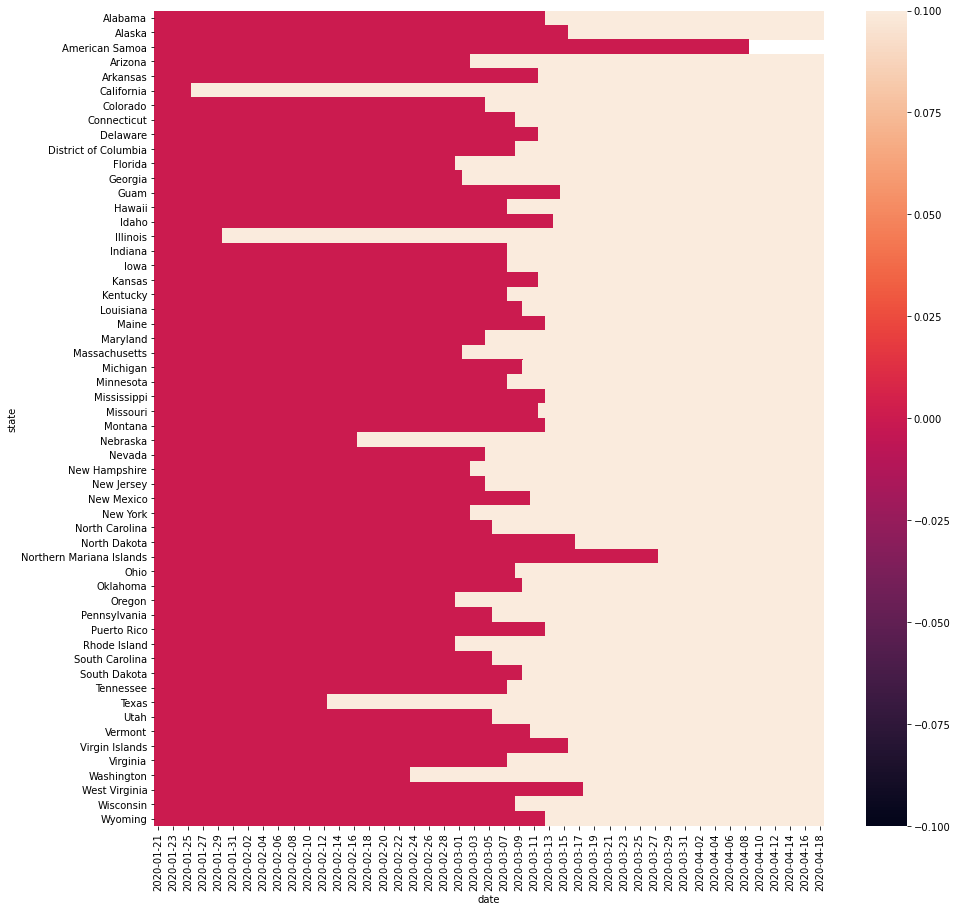

In [27]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sns.heatmap(df.pivot("state", "date", "log_cases").fillna(0), yticklabels=True)

In [171]:
df[df['state'] == 'California']

,state,date,fips,cases,deaths,new_cases,log_cases,log_new_cases,prop_new_to_total_cases
146,California,2020-01-25,6,1,0,0.0,0.000000,-inf,0.000000
147,California,2020-01-26,6,2,0,1.0,0.693147,0.000000,0.500000
148,California,2020-01-27,6,2,0,0.0,0.693147,-inf,0.000000
149,California,2020-01-28,6,2,0,0.0,0.693147,-inf,0.000000
150,California,2020-01-29,6,2,0,0.0,0.693147,-inf,0.000000
...,...,...,...,...,...,...,...,...,...
213,California,2020-04-01,6,9816,212,1234.0,9.191769,7.118016,0.125713
214,California,2020-04-02,6,10995,243,1179.0,9.305196,7.072422,0.107231
215,California,2020-04-03,6,12569,282,1574.0,9.438989,7.361375,0.125229
216,California,2020-04-04,6,13796,323,1227.0,9.532134,7.112327,0.088939
